# Data Loading

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from processing_utils.feature_data_from_mat import load_subject_high_gamma

In [3]:
sig = True
zscore = False
cluster = False

In [3]:
phon_labels = ['a', 'ae', 'i', 'u', 'b', 'p', 'v', 'g', 'k']
artic_labels = ['low', 'high', 'labial', 'dorsal']
phon_to_artic_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4}

In [5]:
def phon_to_artic(phon_idx, phon_to_artic_conv):
    return phon_to_artic_conv[phon_idx]

def phon_to_artic_seq(phon_seq, phon_to_artic_conv):
    flat_seq = phon_seq.flatten()
    artic_conv = np.array([phon_to_artic(phon_idx, phon_to_artic_conv) for phon_idx in flat_seq])
    return np.reshape(artic_conv, phon_seq.shape)

### Relative to Response Onset

Load in S14 Data

In [6]:
S14_hg_trace, S14_hg_map, S14_phon_labels = load_subject_high_gamma('S14', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(144, 200, 111)
(144, 8, 16, 200)
(144, 3)


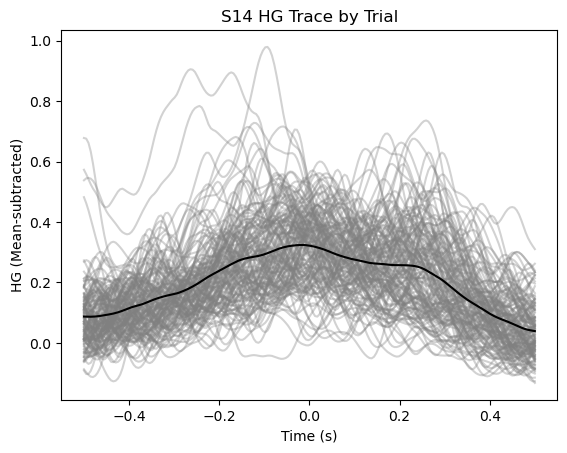

In [7]:
print(S14_hg_trace.shape)
print(S14_hg_map.shape)
print(S14_phon_labels.shape)

plt.figure()
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(S14_hg_trace, axis=2).T, 'grey', alpha=0.35)
plt.plot(np.linspace(-0.5, 0.5, 200), np.mean(np.mean(S14_hg_trace, axis=2), axis=0), 'black')
plt.xlabel('Time (s)')
plt.ylabel('HG (Mean-subtracted)')
plt.title('S14 HG Trace by Trial')
plt.show()

Load in S26 Data

In [8]:
S26_hg_trace, S26_hg_map, S26_phon_labels = load_subject_high_gamma('S26', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(148, 200, 111)
(148, 8, 16, 200)
(148, 3)


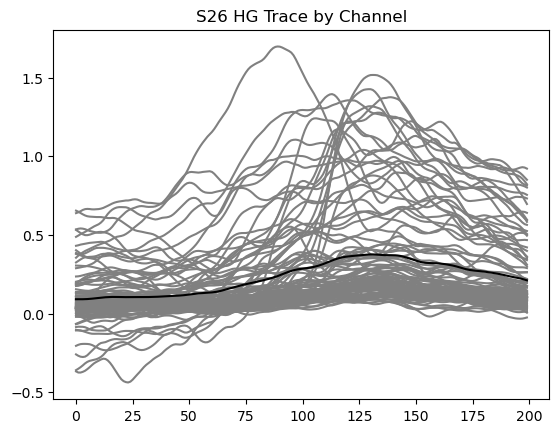

In [9]:
print(S26_hg_trace.shape)
print(S26_hg_map.shape)
print(S26_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S26_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S26_hg_trace, axis=0), axis=1), 'black')
plt.title('S26 HG Trace by Channel')
plt.show()

Load in S23 Data

In [10]:
S23_hg_trace, S23_hg_map, S23_phon_labels = load_subject_high_gamma('S23', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(151, 200, 63)
(151, 8, 16, 200)
(151, 3)


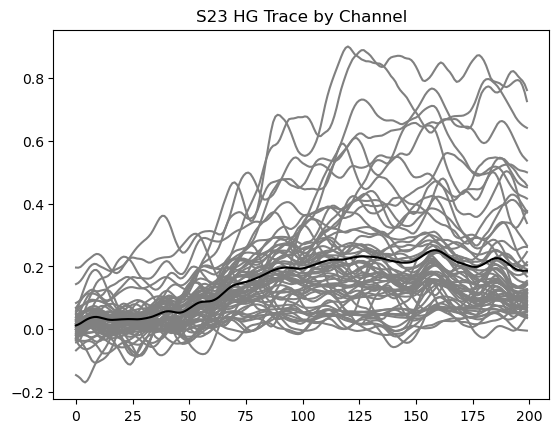

In [11]:
print(S23_hg_trace.shape)
print(S23_hg_map.shape)
print(S23_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S23_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S23_hg_trace, axis=0), axis=1), 'black')
plt.title('S23 HG Trace by Channel')
plt.show()

Load in S33 Data

In [12]:
S33_hg_trace, S33_hg_map, S33_phon_labels = load_subject_high_gamma('S33', sig_channel=sig, zscore=zscore, cluster=cluster, data_dir='../data/')

(46, 200, 149)
(46, 12, 24, 200)
(46, 3)


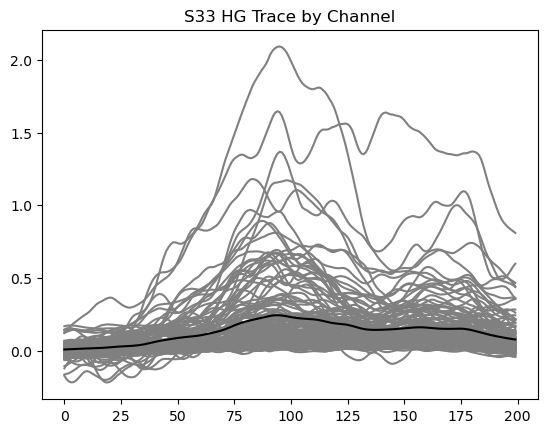

In [13]:
print(S33_hg_trace.shape)
print(S33_hg_map.shape)
print(S33_phon_labels.shape)

plt.figure()
plt.plot(np.mean(S33_hg_trace, axis=0), 'grey')
plt.plot(np.mean(np.mean(S33_hg_trace, axis=0), axis=1), 'black')
plt.title('S33 HG Trace by Channel')
plt.show()

### Relative to Different Phoneme Onsets

In [14]:
from processing_utils.feature_data_from_mat import load_subject_high_gamma_phoneme

S14 Data

In [15]:
S14_hg_data = load_subject_high_gamma_phoneme('S14', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(144, 200, 111) (144, 200, 111) (144, 200, 111)
(144, 8, 16, 200) (144, 8, 16, 200) (144, 8, 16, 200)
(144,) (144,) (144,) (144, 3)


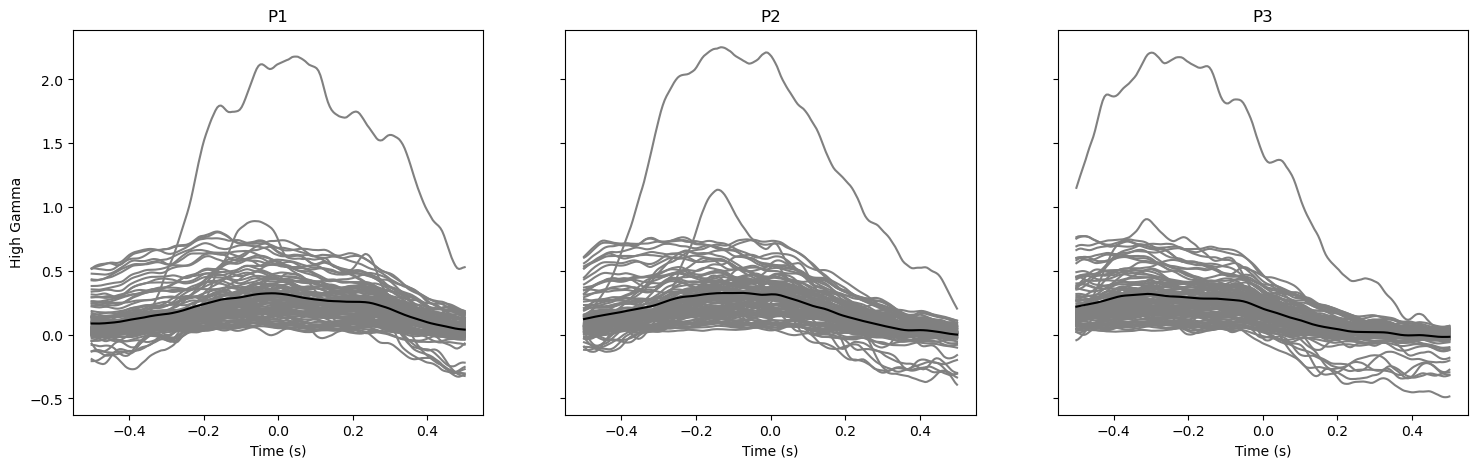

In [16]:
print(S14_hg_data['X1'].shape, S14_hg_data['X2'].shape, S14_hg_data['X3'].shape)
print(S14_hg_data['X1_map'].shape, S14_hg_data['X2_map'].shape, S14_hg_data['X3_map'].shape)
print(S14_hg_data['y1'].shape, S14_hg_data['y2'].shape, S14_hg_data['y3'].shape, S14_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S14_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S14_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S14_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S14_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S14_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S14_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S14_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S26 data

In [17]:
S26_hg_data = load_subject_high_gamma_phoneme('S26', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(148, 200, 111) (148, 200, 111) (148, 200, 111)
(148, 8, 16, 200) (148, 8, 16, 200) (148, 8, 16, 200)
(148,) (148,) (148,) (148, 3)


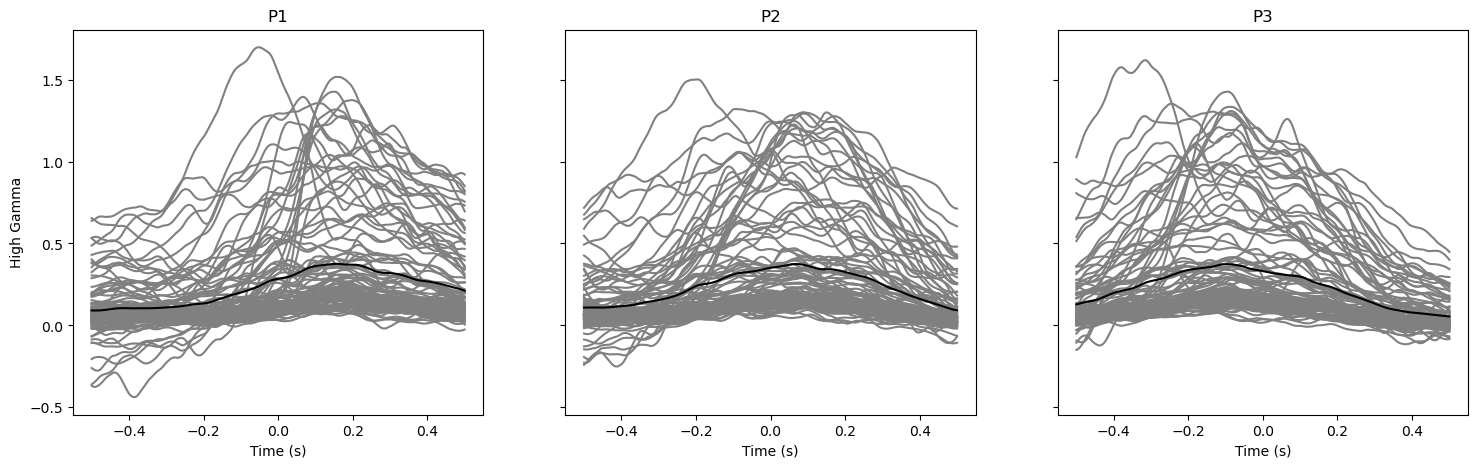

In [18]:
print(S26_hg_data['X1'].shape, S26_hg_data['X2'].shape, S26_hg_data['X3'].shape)
print(S26_hg_data['X1_map'].shape, S26_hg_data['X2_map'].shape, S26_hg_data['X3_map'].shape)
print(S26_hg_data['y1'].shape, S26_hg_data['y2'].shape, S26_hg_data['y3'].shape, S26_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S26_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S26_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S26_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S26_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S26_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S26_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S26_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()


S23 Data

In [19]:
S23_hg_data = load_subject_high_gamma_phoneme('S23', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(151, 200, 63) (151, 200, 63) (151, 200, 63)
(151, 8, 16, 200) (151, 8, 16, 200) (151, 8, 16, 200)
(151,) (151,) (151,) (151, 3)


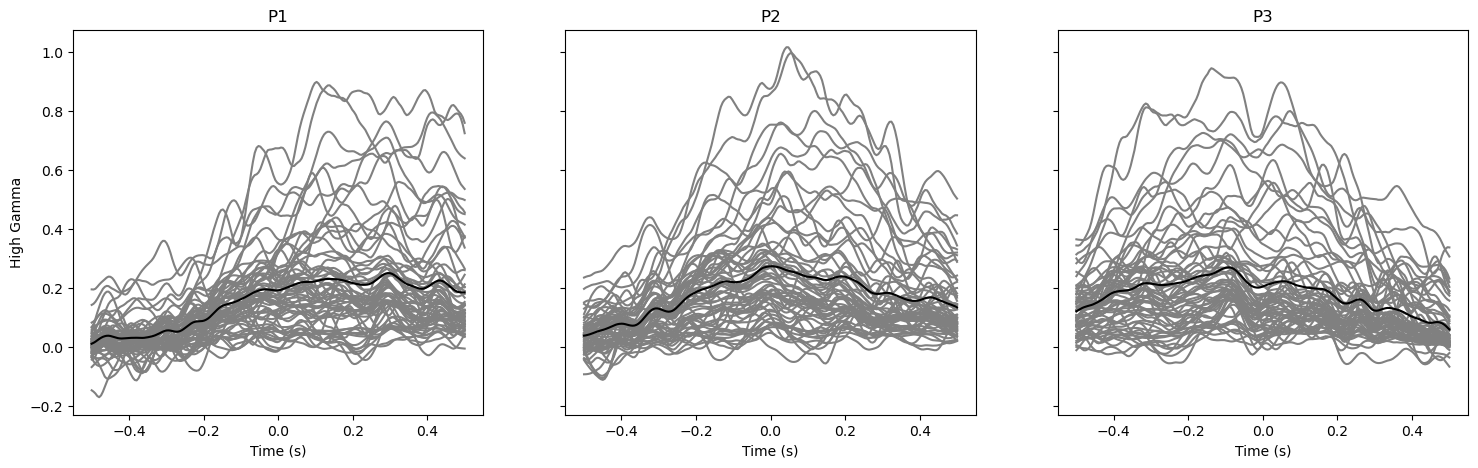

In [20]:
print(S23_hg_data['X1'].shape, S23_hg_data['X2'].shape, S23_hg_data['X3'].shape)
print(S23_hg_data['X1_map'].shape, S23_hg_data['X2_map'].shape, S23_hg_data['X3_map'].shape)
print(S23_hg_data['y1'].shape, S23_hg_data['y2'].shape, S23_hg_data['y3'].shape, S23_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S23_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S23_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S23_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S23_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S23_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S23_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S23_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

S33 Data

In [21]:
S33_hg_data = load_subject_high_gamma_phoneme('S33', phons=[1, 2, 3], cluster=cluster, zscore=zscore, data_dir='../data/')

(46, 200, 149) (46, 200, 149) (46, 200, 149)
(46, 12, 24, 200) (46, 12, 24, 200) (46, 12, 24, 200)
(46,) (46,) (46,) (46, 3)


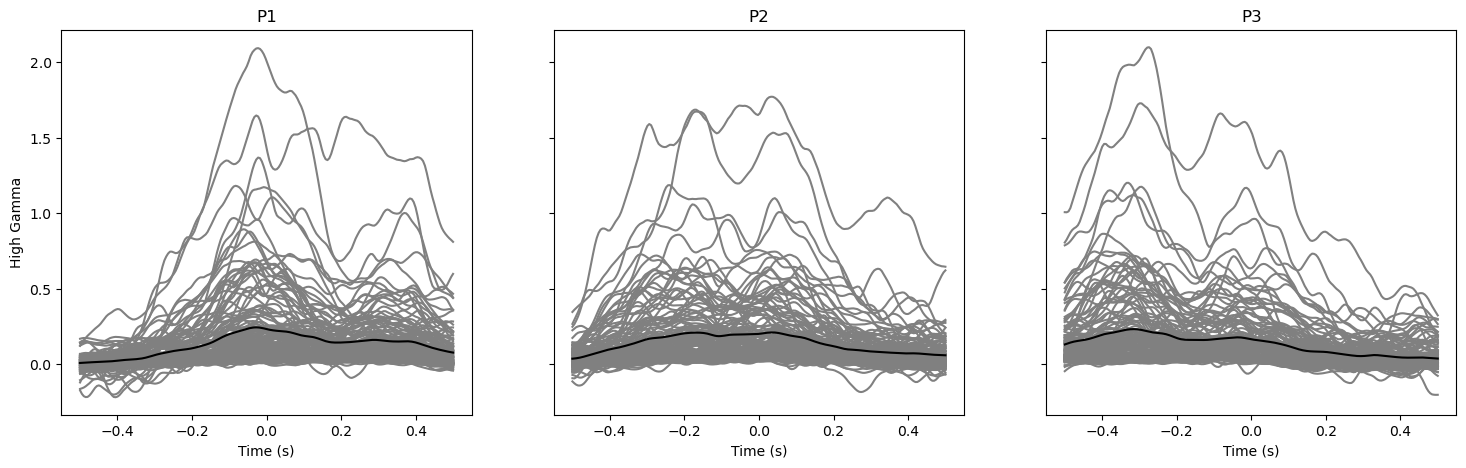

In [22]:
print(S33_hg_data['X1'].shape, S33_hg_data['X2'].shape, S33_hg_data['X3'].shape)
print(S33_hg_data['X1_map'].shape, S33_hg_data['X2_map'].shape, S33_hg_data['X3_map'].shape)
print(S33_hg_data['y1'].shape, S33_hg_data['y2'].shape, S33_hg_data['y3'].shape, S33_hg_data['y_full_phon'].shape)

t = np.linspace(-0.5, 0.5, S33_hg_data['X1'].shape[1])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
ax1.plot(t, np.mean(S33_hg_data['X1'], axis=0), 'grey')
ax1.plot(t, np.mean(np.mean(S33_hg_data['X1'], axis=0), axis=1), 'black')
ax1.set_title('P1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('High Gamma')

ax2.plot(t, np.mean(S33_hg_data['X2'], axis=0), 'grey')
ax2.plot(t, np.mean(np.mean(S33_hg_data['X2'], axis=0), axis=1), 'black')
ax2.set_title('P2')
ax2.set_xlabel('Time (s)')
# ax2.set_ylabel('High Gamma')

ax3.plot(t, np.mean(S33_hg_data['X3'], axis=0), 'grey')
ax3.plot(t, np.mean(np.mean(S33_hg_data['X3'], axis=0), axis=1), 'black')
ax3.set_title('P3')
ax3.set_xlabel('Time (s)')
# ax3.set_ylabel('High Gamma')

plt.show()

In [23]:
S14_artic_labels = phon_to_artic_seq(S14_phon_labels, phon_to_artic_dict)
S26_artic_labels = phon_to_artic_seq(S26_phon_labels, phon_to_artic_dict)
S23_artic_labels = phon_to_artic_seq(S23_phon_labels, phon_to_artic_dict)
S33_artic_labels = phon_to_artic_seq(S33_phon_labels, phon_to_artic_dict)

### Collapse Across Positions

In [24]:
S14_hg_collapsed = np.concatenate((S14_hg_data['X1'], S14_hg_data['X2'], S14_hg_data['X3']), axis=0)
S14_phon_labels_collapsed = np.concatenate((S14_hg_data['y1'], S14_hg_data['y2'], S14_hg_data['y3']), axis=0)

S26_hg_collapsed = np.concatenate((S26_hg_data['X1'], S26_hg_data['X2'], S26_hg_data['X3']), axis=0)
S26_phon_labels_collapsed = np.concatenate((S26_hg_data['y1'], S26_hg_data['y2'], S26_hg_data['y3']), axis=0)

S23_hg_collapsed = np.concatenate((S23_hg_data['X1'], S23_hg_data['X2'], S23_hg_data['X3']), axis=0)
S23_phon_labels_collapsed = np.concatenate((S23_hg_data['y1'], S23_hg_data['y2'], S23_hg_data['y3']), axis=0)

S33_hg_collapsed = np.concatenate((S33_hg_data['X1'], S33_hg_data['X2'], S33_hg_data['X3']), axis=0)
S33_phon_labels_collapsed = np.concatenate((S33_hg_data['y1'], S33_hg_data['y2'], S33_hg_data['y3']), axis=0)

In [25]:
S14_artic_labels_collapsed = phon_to_artic_seq(S14_phon_labels_collapsed, phon_to_artic_dict)
S26_artic_labels_collapsed = phon_to_artic_seq(S26_phon_labels_collapsed, phon_to_artic_dict)
S23_artic_labels_collapsed = phon_to_artic_seq(S23_phon_labels_collapsed, phon_to_artic_dict)
S33_artic_labels_collapsed = phon_to_artic_seq(S33_phon_labels_collapsed, phon_to_artic_dict)

# Joint PCA Decomp Decoding

### Data Preparation

#### Saving pt data as pkl dict to load from

In [30]:
# S14_hg_data['y_full_artic'] = S14_artic_labels
# S26_hg_data['y_full_artic'] = S26_artic_labels
# S23_hg_data['y_full_artic'] = S23_artic_labels
# S33_hg_data['y_full_artic'] = S33_artic_labels

# S14_hg_data['X_collapsed'] = S14_hg_collapsed
# S26_hg_data['X_collapsed'] = S26_hg_collapsed
# S23_hg_data['X_collapsed'] = S23_hg_collapsed
# S33_hg_data['X_collapsed'] = S33_hg_collapsed

# S14_hg_data['y_phon_collapsed'] = S14_phon_labels_collapsed
# S26_hg_data['y_phon_collapsed'] = S26_phon_labels_collapsed
# S23_hg_data['y_phon_collapsed'] = S23_phon_labels_collapsed
# S33_hg_data['y_phon_collapsed'] = S33_phon_labels_collapsed

# S14_hg_data['y_artic_collapsed'] = S14_artic_labels_collapsed
# S26_hg_data['y_artic_collapsed'] = S26_artic_labels_collapsed
# S23_hg_data['y_artic_collapsed'] = S23_artic_labels_collapsed
# S33_hg_data['y_artic_collapsed'] = S33_artic_labels_collapsed


In [31]:
# pt_dict = {}

# # merge pretrain information with pt data
# pt_dict['S14'] = S14_hg_data | {'pre_pts': ['S26', 'S33', 'S23']}
# pt_dict['S26'] = S26_hg_data | {'pre_pts': ['S14', 'S33', 'S23']}
# pt_dict['S23'] = S23_hg_data | {'pre_pts': ['S14', 'S26', 'S33']}
# pt_dict['S33'] = S33_hg_data | {'pre_pts': ['S14', 'S26', 'S23']}

In [32]:
# from utils import save_pkl

# save_pkl(pt_dict, '../data/pt_decoding_data.pkl')

### Main decoding cell

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from tqdm.notebook import tqdm

from alignment_methods import JointPCADecomp, CCAAlign
import utils

# patient and target params
pt = 'S14'
p_ind = -1

# experiment params
pool_pre = True
tar_in_train = True
cca_algn = False
joint_dim_red = True
tr_subsamp_r = 0.2

# constant params
n_iter = 50
n_folds = 5
n_comp = 30

# alignment label type
algn_type = 'artic_seq'
# algn_type = 'phon_seq'
algn_grouping = 'class'

# decoding label type
lab_type = 'phon'
# lab_type = 'artic'

# dimensionality reduction type
red_method = 'PCA'
dim_red = PCA

# decoding run filename
filename_suffix = 'joint_pca_pt_pooled'
filename = f'../acc_data/tr_subsamp_accs/{pt}_{"p" if lab_type == "phon" else "a"}{"All" if p_ind == -1 else p_ind}_{filename_suffix}.pkl'

# load data
pt_data = utils.load_pkl('../data/pt_decoding_data.pkl')
tar_data, pre_data = utils.decoding_data_from_dict(pt_data, pt, p_ind,
                                                   lab_type=lab_type,
                                                   algn_type=algn_type)
D_tar, lab_tar, lab_tar_full = tar_data
D1, lab1, lab1_full = pre_data[0]
D2, lab2, lab2_full = pre_data[1]
D3, lab3, lab3_full = pre_data[2]

iter_accs = []
wrong_trs_iter = []
y_true_iter, y_pred_iter = [], []
for _ in tqdm(range(n_iter)):
    y_true_all, y_pred_all = [], []
    wrong_trs_fold = []
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    for train_idx, test_idx in cv.split(D_tar, lab_tar):
        X1, X2, X3 = D1, D2, D3
        y1, y2, y3 = lab1, lab2, lab3
        y1_full, y2_full, y3_full = lab1_full, lab2_full, lab3_full
        
        # split target data into train and test
        X_tar_train, X_tar_test = D_tar[train_idx], D_tar[test_idx]
        y_tar_train, y_tar_test = lab_tar[train_idx], lab_tar[test_idx]
        y_tar_full_train, y_tar_full_test = (lab_tar_full[train_idx],
                                             lab_tar_full[test_idx])
        
        # subsample training data observations/trials
        if tr_subsamp_r < 1:
            # train test split to subsample training data with stratification
            # (could also use np.random.choice for non-stratified subsampling)
            X_tar_train, _, y_tar_train, _, y_tar_full_train, _ = (
                                    train_test_split(X_tar_train, y_tar_train,
                                                     y_tar_full_train,
                                                     train_size=tr_subsamp_r,
                                                     stratify=y_tar_train,
                                                     shuffle=True))

        # learn joint PCA decomposition from full label sequences
        if joint_dim_red:
            jointPCA = JointPCADecomp(n_components=n_comp)
            X1, X2, X3, X_tar_train = jointPCA.fit_transform([X1, X2, X3,
                                                            X_tar_train],
                                                            [y1_full, y2_full,
                                                            y3_full,
                                                            y_tar_full_train])
            # apply target transformation to test data
            X_tar_test = jointPCA.transform(X_tar_test, idx=3)
        else:  # apply separate dimensionality reduction to each dataset
            X1_p, X2_p, X3_p, X_tar_train_p, X_tar_test_p = (
                                    [X.reshape(-1, X.shape[-1]) for X in
                                     (X1, X2, X3, X_tar_train, X_tar_test)])
            X1_p, X2_p, X3_p = [dim_red(n_components=n_comp).fit_transform(X)
                                for X in [X1_p, X2_p, X3_p]]
            tar_dr = dim_red(n_components=n_comp)
            X_tar_train_p = tar_dr.fit_transform(X_tar_train_p)
            X_tar_test_p = tar_dr.transform(X_tar_test_p)
            X1, X2, X3, X_tar_train, X_tar_test = [X.reshape(Xs.shape[0], -1,
                                                             n_comp)
                                                   for (X, Xs) in
                                                   zip((X1_p, X2_p, X3_p,
                                                        X_tar_train_p,
                                                        X_tar_test_p),
                                                       (X1, X2, X3,
                                                        X_tar_train,
                                                        X_tar_test))]

        # align each pooled patient data to target data with CCA
        if cca_algn:
            cca1 = CCAAlign(type=algn_grouping)
            cca2 = CCAAlign(type=algn_grouping)
            cca3 = CCAAlign(type=algn_grouping)
            cca1.fit(X_tar_train, X1, y_tar_full_train, y1_full)
            cca2.fit(X_tar_train, X2, y_tar_full_train, y2_full)
            cca3.fit(X_tar_train, X3, y_tar_full_train, y3_full)
            X1 = cca1.transform(X1)
            X2 = cca2.transform(X2)
            X3 = cca3.transform(X3)

        # reshape to trials x features
        X_tar_train = X_tar_train.reshape(X_tar_train.shape[0], -1)
        X_tar_test = X_tar_test.reshape(X_tar_test.shape[0], -1)
        X1 = X1.reshape(X1.shape[0], -1)
        X2 = X2.reshape(X2.shape[0], -1)
        X3 = X3.reshape(X3.shape[0], -1)

        if not pool_pre:
            X_train, y_train = X_tar_train, y_tar_train
        else:
            if not tar_in_train:
                X_train = np.concatenate((X1, X2, X3), axis=0)
                y_train = np.concatenate((y1, y2, y3), axis=0)
            else:
                X_train = np.concatenate((X_tar_train, X1, X2, X3), axis=0)
                y_train = np.concatenate((y_tar_train, y1, y2, y3), axis=0)
                # X_train = np.concatenate((X_tar_train, X1, X2), axis=0)  # no S23
                # y_train = np.concatenate((y_tar_train, y1, y2), axis=0)  # no S23
        X_test = X_tar_test
        y_test = y_tar_test

        # sc = MinMaxScaler()
        # X_train = sc.fit_transform(X_train)
        # X_test = sc.transform(X_test)

        clf = BaggingClassifier(base_estimator=SVC(kernel='linear'),
                                n_estimators=10)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        wrong_idxs = np.where(y_test != y_pred)[0]
        wrong_trs_fold.extend(test_idx[wrong_idxs])

    y_true_iter.append(y_true_all)
    y_pred_iter.append(y_pred_all)
    wrong_trs_iter.append(wrong_trs_fold)
    bal_acc = balanced_accuracy_score(y_true_all, y_pred_all)
    print(bal_acc)
    iter_accs.append(bal_acc)

out_data = {}
out_data['y_true'] = y_true_iter
out_data['y_pred'] = y_pred_iter
out_data['wrong_trs'] = wrong_trs_iter
out_data['accs'] = iter_accs
out_data['params'] = {'pt': pt, 'p_ind': p_ind, 'pool_pre': pool_pre,
                      'tar_in_train': tar_in_train, 'cca_algn': cca_algn,
                      'joint_dim_red': joint_dim_red, 'n_iter': n_iter,
                      'n_folds': n_folds, 'n_comp': n_comp,
                      'algn_type': algn_type, 'algn_grouping': algn_grouping,
                      'lab_type': lab_type, 'red_method': red_method,
                      'dim_red': dim_red}
utils.save_pkl(out_data, filename)


print(iter_accs)
print(f'Mean acc: {np.mean(iter_accs)}, Std: {np.std(iter_accs)}')
print()    


  0%|          | 0/50 [00:00<?, ?it/s]

0.2292612761403842
0.2640119725855573
0.25903261374281666
0.22789566002269362
0.20829630814502803
0.23058568318387618
0.2329654979860512
0.2334276346580465
0.253048626277953
0.25344652605473483
0.23065416507126704
0.2602078220900948
0.2613433942163954
0.24799103463977953
0.2249837654392056
0.23996330770829463
0.2532365273269337
0.24312241506986
0.24866670947193714
0.2449689794368559
0.2250018698997297
0.2548247685703954
0.27308304552606333
0.2580910026292679
0.26166725572038113
0.23466359021087657
0.2695332520011006
0.25495171373013525
0.24179395732642867
0.26064825839366257
0.2570077048202287
0.23962419401688248
0.2826494869114137
0.2466386637256689
0.2301184785597714
0.2594464171477936
0.25328599238478006
0.2617521479741785
0.22731496860575337
0.25255311300048494
0.2827239685571918
0.2638790726282814
0.23875044105789792
0.2589588214406504
0.23911688360959088
0.2345013133008793
0.27716168513223594
0.249983951259921
0.2220252773513817
0.23478153871308358
[0.2292612761403842, 0.26401197

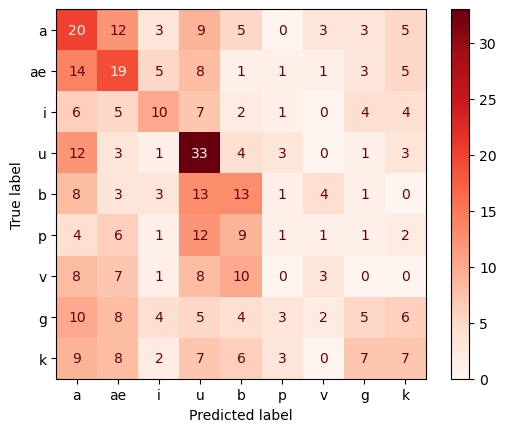

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cmat = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=phon_labels)
disp.plot(cmap='Reds')
plt.show()

In [7]:
np.mean(utils.load_pkl('../acc_data/tr_subsamp_accs/S14_pAll_joint_pca_pooled.pkl')['accs'])

0.24787285506947745

# Decoding Results

In [1]:
# DATA_PATH = '/hpc/home/zms14/workspace/outputs/alignment_accs/'
DATA_PATH = '/hpc/home/zms14/data/results/alignment/'
# DATA_PATH = '/hpc/home/zms14/repos/RNN_phoneme_decoding_micro/phoneme_encoder_decoder/acc_data/tr_subsamp_accs/'
# DATA_PATH = 'C:/Users/Zac/OneDrive - Duke University/workspace/outputs/alignment_accs/'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import utils

## Plotting Definitions

Plotly default color list

In [3]:
px_colors = [
             '#636EFA',
             '#EF553B',
             '#990099',
            #  '#B6E880',
            #  '#72B7B2',
            #  '#00CC96',
            #  '#FFA15A',
             '#19D3F3',
             '#FF6692',
             '#B6E880',
             '#FF97FF',
             '#FECB52',
            ]

In [4]:
px_default = px.colors.qualitative.Plotly

In [5]:
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

In [6]:
def line(error_y_mode=None, **kwargs):
    """Extension of `plotly.express.line` to use error bands.
    
    From https://stackoverflow.com/questions/69587547/continuous-error-band-with-plotly-express-in-python, user171780"""
    ERROR_MODES = {'bar','band','bars','bands',None}
    if error_y_mode not in ERROR_MODES:
        raise ValueError(f"'error_y_mode' must be one of {ERROR_MODES}, received {repr(error_y_mode)}.")
    if error_y_mode in {'bar','bars',None}:
        fig = px.line(**kwargs)
    elif error_y_mode in {'band','bands'}:
        if 'error_y' not in kwargs:
            raise ValueError(f"If you provide argument 'error_y_mode' you must also provide 'error_y'.")
        figure_with_error_bars = px.line(**kwargs)
        fig = px.line(**{arg: val for arg,val in kwargs.items() if arg != 'error_y'})
        for data in figure_with_error_bars.data:
            x = list(data['x'])
            y_upper = list(data['y'] + data['error_y']['array'])
            y_lower = list(data['y'] - data['error_y']['array'] if data['error_y']['arrayminus'] is None else data['y'] - data['error_y']['arrayminus'])
            color = f"rgba({tuple(int(data['line']['color'].lstrip('#')[i:i+2], 16) for i in (0, 2, 4))},.3)".replace('((','(').replace('),',',').replace(' ','')
            fig.add_trace(
                go.Scatter(
                    x = x+x[::-1],
                    y = y_upper+y_lower[::-1],
                    fill = 'toself',
                    fillcolor = color,
                    line = dict(
                        color = 'rgba(255,255,255,0)'
                    ),
                    hoverinfo = "skip",
                    showlegend = False,
                    legendgroup = data['legendgroup'],
                    xaxis = data['xaxis'],
                    yaxis = data['yaxis'],
                )
            )
        # Reorder data as said here: https://stackoverflow.com/a/66854398/8849755
        reordered_data = []
        for i in range(int(len(fig.data)/2)):
            reordered_data.append(fig.data[i+int(len(fig.data)/2)])
            reordered_data.append(fig.data[i])
        fig.data = tuple(reordered_data)
    return fig

## Single Pt Boxplot

In [19]:
pt = 'S14'
p_str = 'All'

p_tar = np.zeros((4, 50))
# p_tar[0,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_ncv_sepPCA_pt-specific.pkl')['accs']
# p_tar[1,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_joint_pca_pt-specific.pkl')['accs']
# p_tar[1,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_ncv_sepPCA_ccaAligned_noS23.pkl')['accs']
# p_tar[3,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_joint_pca_unaligned.pkl')['accs']
# p_tar[2,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_sep_pca_ccaAligned.pkl')['accs']
# p_tar[5,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_joint_pca_ccaAligned.pkl')['accs']
p_tar[0,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp100_pooled_ccaAligned_noCV_rbf_pAlgn.pkl')['accs']
p_tar[1,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp100_pooled_jointPCA_noCV_rbf.pkl')['accs']
p_tar[2,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp100_pooled_ccaAligned_rbf.pkl')['accs']
p_tar[3,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp100_pooled_jointPCA_rbf.pkl')['accs']

# decode_df = pd.DataFrame(p_tar.T, columns=['patient-specific', 'cross-patient_aligned'])
decode_df = pd.DataFrame(p_tar.T, columns=['No CV_CCA', 'No CV_Joint PCA', 'CV_CCA', 'CV_Joint PCA'])
decode_df = pd.melt(decode_df, var_name='Context', value_name='Decoding Accuracy')
decode_df[['CV Type', 'Alignment Type']] = decode_df['Context'].str.split('_', expand=True)
decode_df = decode_df.drop(columns=['Context'])
decode_df = decode_df[['CV Type', 'Alignment Type', 'Decodign Accuracy']]


# # Filter the DataFrame to select the desired decoding types
# selected_decoding_types = ['patient-specific', 'cross-patient_aligned']
# filtered_df = decode_df[decode_df['decoding_type'].isin(selected_decoding_types)]


In [22]:
decode_df

,Decoding Accuracy,CV Type,Alignment Type
0,0.405415,No CV,CCA
1,0.398835,No CV,CCA
2,0.401750,No CV,CCA
3,0.397117,No CV,CCA
4,0.387697,No CV,CCA
...,...,...,...
195,0.391205,CV,Joint PCA
196,0.349222,CV,Joint PCA
197,0.369382,CV,Joint PCA
198,0.400902,CV,Joint PCA


In [33]:
# fig = px.box(decode_df, x='decoding_type', y="accuracy", color='decoding_type', points='all', width=700, height=500)
fig = px.box(decode_df, color='Alignment Type', y="Decoding Accuracy", x='CV Type', points='all', width=650, height=500)
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=0.02,
        xanchor='left',
        x=0.02,
        title_text=''
    ),
    # showlegend=False,
    title_text='Nonlinear SVM Decoding Accuracy By Alignment Type',
    title_x=0.5,
    font=dict(size=18, family='Arial')
)
fig.update_xaxes(
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    tickvals=[0,1],
    range=[-0.5, 1.5],
    # ticktext=['Patient-Specific', 'Shared Neural<br>Latent Space'],
)
fig.update_yaxes(
    title='Decoding Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0.3, 0.5]
)
fig.show()

In [13]:
j_pt = 'S23'

j_tar = np.zeros((4, 50))
j_tar[0,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_sep_pca_pt-specific.pkl')['accs']
j_tar[1,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_joint_pca_pt-specific.pkl')['accs']
j_tar[2,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_sep_pca_unaligned.pkl')['accs']
j_tar[3,:] = utils.load_pkl(DATA_PATH + f'{j_pt}/{j_pt}_pAll_joint_pca_unaligned.pkl')['accs']

In [14]:
decode_df = pd.DataFrame(j_tar.T, columns=['Separate PCA_Patient-Specific', 'Joint PCA_Patient-Specific', 'Separate PCA_Pooling - No CCA', 'Joint PCA_Pooling - No CCA'])
decode_df = pd.melt(decode_df, var_name='Context', value_name='accuracy')
decode_df[['PCA-type', 'Decoding Context']] = decode_df['Context'].str.split(pat='_', n=1, expand=True)
decode_df = decode_df.drop(columns=['Context'])
decode_df = decode_df[['PCA-type', 'Decoding Context', 'accuracy']]

In [15]:
decode_df

,PCA-type,Decoding Context,accuracy
0,Separate PCA,Patient-Specific,0.174804
1,Separate PCA,Patient-Specific,0.176787
2,Separate PCA,Patient-Specific,0.186669
3,Separate PCA,Patient-Specific,0.185849
4,Separate PCA,Patient-Specific,0.185899
...,...,...,...
195,Joint PCA,Pooling - No CCA,0.217518
196,Joint PCA,Pooling - No CCA,0.234408
197,Joint PCA,Pooling - No CCA,0.205967
198,Joint PCA,Pooling - No CCA,0.234159


In [16]:
import plotly.express as px
import seaborn as sns

# fig = px.box(decode_df, x='decoding_type', y="accuracy", color='decoding_type', points='all', width=700, height=500)
fig = px.box(decode_df, x='Decoding Context', y="accuracy", color='PCA-type', points='all', width=600, height=500)
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=0.02,
        xanchor='left',
        x=0.02,
        title_text=''
    ),
    # showlegend=False,
    title_text='S3 Phoneme Decoding',
    # title_text='Decoder Trained on Target Patient',
    title_x=0.5,
    font=dict(size=18, family='Arial')
)
fig.update_xaxes(
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    tickvals=[0,1],
    range=[-0.5, 1.5],
    # ticktext=['Patient-Specific', 'Shared Neural<br>Latent Space'],
)
fig.update_yaxes(
    title='Decoding Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.3]
)
fig.show()

#### Experimental

In [132]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

# Create a Box plot trace for each column
for i in range(0, len(pd.unique(decode_df['decoding_type']))):
    fig.add_trace(go.Violin(x=decode_df['decoding_type'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]],
                            y=decode_df['accuracy'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]],
                            points='all',  # Show all data points
                            box_visible=False,
                            side='negative',
                            pointpos=0.45,  # Position points at their value
                            jitter=0.3,   # Add jitter for better visualization
                        ))
    fig.add_trace(go.Box(x=[i]*len(decode_df['decoding_type'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]]),
                         y=decode_df['accuracy'][decode_df['decoding_type'] == pd.unique(decode_df['decoding_type'])[i]],
                         width=0.25
                        ))

# fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.5,
                  violinmode='overlay',
                  width=600,
                  height=500,
                  showlegend=False,
                  plot_bgcolor='white'
                  )
fig.update_xaxes(
    title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    tickvals=[0,1,2],
    ticktext=['Patient-specific', 'Cross-patient', 'Cross-patient,<br>domain-adapted'],
)
fig.update_yaxes(
    title='Decoding<br>Accuracy',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.55]
)
fig.show()

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



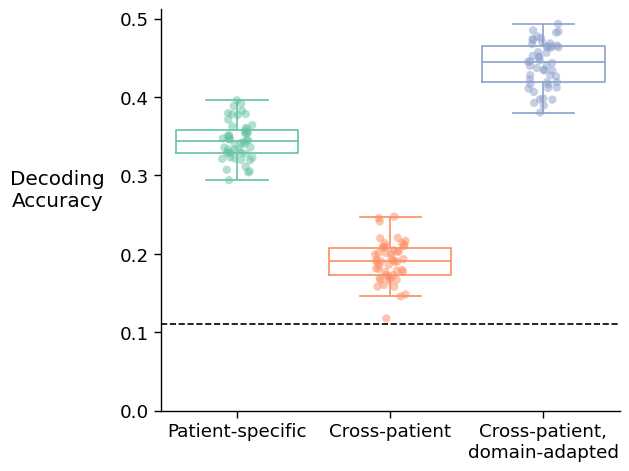

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot using Seaborn
# plt.figure(figsize=(8, 6))
sns.set_context('paper', font_scale=1.5)
g1 = sns.catplot(x='decoding_type', y='accuracy', hue='decoding_type', data=decode_df, kind='box', legend=False, palette='Set2', fliersize=0, aspect=1.2, fill=False)
g2 = sns.stripplot(x='decoding_type', y='accuracy', data=decode_df, jitter=True, alpha=0.5, size=6, hue='decoding_type', palette='Set2')
g1.refline(y=1/9, color='black', linestyle='--', label='Chance')

# Customize the plot
# plt.title('Cross-Patient Decoding')
plt.xlabel('')
plt.ylabel('Decoding\nAccuracy', rotation=0, labelpad=45)
g1.set_xticklabels(['Patient-specific', 'Cross-patient', 'Cross-patient,\ndomain-adapted'])
plt.ylim(bottom=0)  # You can adjust the y-axis limits as needed

# Show the plot
sns.despine()
plt.show()

## Multi Pt Boxplot

In [81]:
import pandas as pd

no_S23 = False
pt_list = ['S14', 'S26', 'S33'] if no_S23 else ['S14', 'S26', 'S23', 'S33']
pInd_list = [-1, 1, 2, 3]

wide_dfs = []
long_dfs = []
for pt in pt_list:
    for p_ind in pInd_list:
        p_str = 'pAll' if p_ind == -1 else f'p{p_ind}'

        p_tar = np.zeros((4, 50))
        p_tar[0,:] = utils.load_pkl(DATA_PATH + f'{pt}/ptSpecific/{pt}_{p_str}_ptSpecific_rbf_noCV.pkl')['accs']
        p_tar[1,:] = utils.load_pkl(DATA_PATH + f'{pt}/unaligned/{pt}_{p_str}_pooled_unaligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
        p_tar[2,:] = utils.load_pkl(DATA_PATH + f'{pt}/cca/{pt}_{p_str}_pooled_ccaAligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
        p_tar[3,:] = utils.load_pkl(DATA_PATH + f'{pt}/mcca/{pt}_{p_str}_pooled_mccaAligned{"_noS23" if no_S23 else ""}_rbf_noCV.pkl')['accs']
        decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - Unaligned', 'Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned'])
        wide_dfs.append(decode_df)
        decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='accuracy')
        decode_df['Patient'] = pt
        decode_df['Phoneme Index'] = p_str
        cols = decode_df.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        decode_df = decode_df[cols]
        long_dfs.append(decode_df)
    # # p_tar = np.zeros((3, 25))
    # p_tar = np.zeros((3, 50))
    # # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_ncv_sepPCA_pt-specific.pkl')['accs']
    # # p_tar[1,:] = np.random.choice(utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_sep_pca_unaligned_noS23.pkl')['accs'], size=25)
    # # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_ncv_sepPCA_ccaAligned_noS23.pkl')['accs']
    # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'{pt}/pAll/{pt}_pAll_trSubsamp100_ptSpecific_rbf.pkl')['accs']
    # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'{pt}/pAll/{pt}_pAll_trSubsamp100_pooled_unaligned_rbf_wS23.pkl')['accs']
    # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'{pt}/pAll/{pt}_pAll_trSubsamp100_pooled_unaligned_rbf_wS23.pkl)['accs']
    # p_tar[3,:] = utils.load_pkl(DATA_PATH + f'{pt}/pAll/{pt}_pAll_trSubsamp100_pooled_jointPCA_rbf_wS23.pkl')['accs'
    # # decode_df = pd.DataFrame(p_tar.T, columns=['Patient-Specific', 'Pooling - Unaligned', 'Pooling - Aligned'])
    # # p_tar = np.zeros((3, 50))
    # # p_tar[0,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_sep_pca_unaligned_noS23_noTar.pkl')['accs']
    # # p_tar[1,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_pooled_ccaAligned_noTar_rbf.pkl')['accs']
    # # p_tar[2,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_pAll_sep_pca_randAligned_noTar.pkl')['accs']
    # decode_df = pd.DataFrame(p_tar.T, columns=['Pooling - Unaligned', 'Pooling - Aligned', 'Random Data - Aligned'])
    # decode_df = pd.melt(decode_df, var_name='Decoding Context', value_name='accuracy')
    # decode_df['subject'] = pt
    # cols = decode_df.columns.tolist()
    # cols = cols[-1:] + cols[:-1]
    # decode_df = decode_df[cols]
    # dfs.append(decode_df)
decode_df_wide = pd.concat(wide_dfs)
decode_df_long = pd.concat(long_dfs)

In [84]:
decode_df_wide

,Patient-Specific,Pooling - Unaligned,Pooling - CCA-Aligned,Pooling - MCCA-Aligned
0,0.380515,0.297608,0.379555,0.306775
1,0.370823,0.310472,0.399158,0.317636
2,0.357651,0.296962,0.380208,0.333938
3,0.346721,0.304999,0.413526,0.316897
4,0.351522,0.300901,0.389988,0.318387
...,...,...,...,...
45,0.212346,0.160494,0.432099,0.316049
46,0.169136,0.146914,0.450617,0.381481
47,0.262963,0.204938,0.369136,0.432099
48,0.238272,0.245679,0.416049,0.344444


In [83]:
decode_df_long

,Phoneme Index,Decoding Context,accuracy,Patient
0,pAll,Patient-Specific,0.380515,S14
1,pAll,Patient-Specific,0.370823,S14
2,pAll,Patient-Specific,0.357651,S14
3,pAll,Patient-Specific,0.346721,S14
4,pAll,Patient-Specific,0.351522,S14
...,...,...,...,...
195,p3,Pooling - MCCA-Aligned,0.316049,S33
196,p3,Pooling - MCCA-Aligned,0.381481,S33
197,p3,Pooling - MCCA-Aligned,0.432099,S33
198,p3,Pooling - MCCA-Aligned,0.344444,S33


In [77]:
# get the mean and std of each decoding context and subject in decoding_df
decode_df.groupby(['Patient', 'Phoneme Index', 'Decoding Context']).agg({'accuracy': ['mean', 'std']})


accuracy          
                                                  mean       std
Patient Phoneme Index Decoding Context                          
S14     p1            Patient-Specific        0.507205  0.023898
                      Pooling - CCA-Aligned   0.519272  0.027390
                      Pooling - MCCA-Aligned  0.407332  0.026387
                      Pooling - Unaligned     0.448484  0.026737
        p2            Patient-Specific        0.391326  0.022034
...                                                ...       ...
S33     p3            Pooling - Unaligned     0.232568  0.050074
        pAll          Patient-Specific        0.261978  0.024491
                      Pooling - CCA-Aligned   0.439470  0.020457
                      Pooling - MCCA-Aligned  0.433187  0.029059
                      Pooling - Unaligned     0.204093  0.024576

[64 rows x 2 columns]

In [129]:
import plotly.express as px
import seaborn as sns

fig_ind = 'pAll'
fig_df = decode_df_long[decode_df_long['Phoneme Index'] == fig_ind]
fig = px.box(fig_df, x='Patient', y="accuracy", color='Decoding Context', points='all', width=1200, height=600, color_discrete_sequence=px_colors)
# fig = px.box(decode_df, x='Patient', y="accuracy", color='Decoding Context', points='all', width=1200, height=2400, color_discrete_sequence=px_colors, facet_row='Phoneme Index')
# fig = px.box(decode_df, x='subject', y="accuracy", color='Decoding Context', points='all', width=850, height=500, color_discrete_sequence=px_colors[1:])
fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='bottom right')
# fig.add_hline(y=1/9, line_dash='dash', line_color='grey', annotation_text='Chance', annotation_position='right')
fig.update_layout(
    plot_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=0.02,
        xanchor='left',
        x=0.01,
        title_text=''
    ),
    # showlegend=False,
    # title_text=f'Phoneme Decoding - Target Patient in Training Set',
    title_text=f'{fig_ind} Phoneme Decoding - Target Patient in Training Set',
    # title_text='Decoder Only Trained on Non-Target Patients',
    title_x=0.5,
    font=dict(size=18, family='Arial')
)
fig.update_xaxes(
    title='Target Patient',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    tickvals=[0,1,2,3],
    ticktext=['S1', 'S2', 'S3', 'S4'],
    range=[-0.5, 3.5],
    # tickvals=[0,1,2],
    # ticktext=['S1', 'S2', 'S4'],
    # range=[-0.5, 2.5]
)
fig.update_yaxes(
    title='Decoding Accuracy',
    # title='',
    mirror=False,
    ticks='outside',
    showline=True,
    linecolor='black',
    showgrid=False,
    range=[0, 0.55]
)
fig.show()

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight

/hpc/group/coganlab/zms14/miniconda3/envs/test5/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



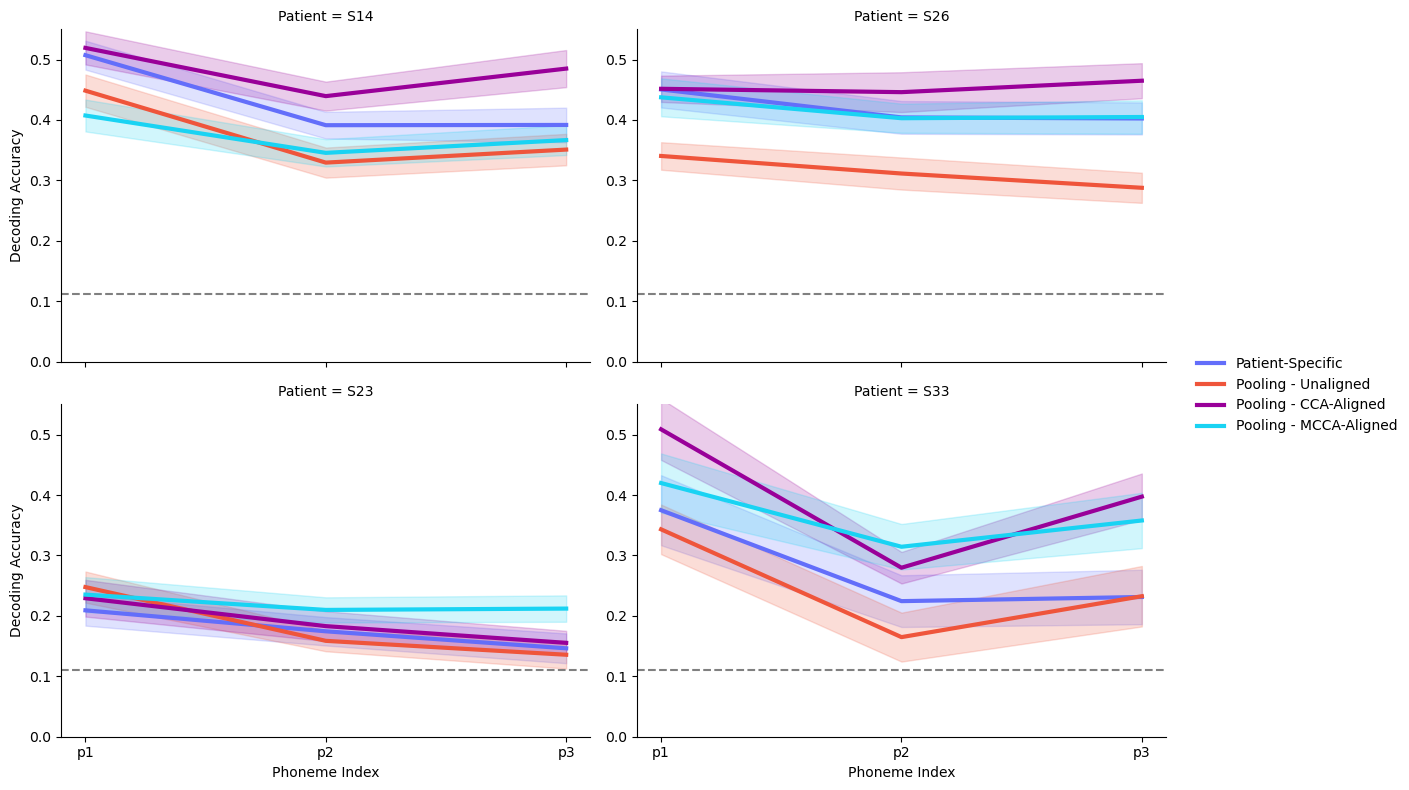

In [118]:
fig_df = decode_df_long[decode_df_long['Phoneme Index'] != 'pAll']

g = sns.FacetGrid(fig_df, col='Patient', col_wrap=2, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.lineplot,
                x='Phoneme Index',
                y='accuracy',
                hue='Decoding Context',
                palette=px_colors[:len(np.unique(fig_df['Decoding Context']))],
                markers=True,
                # err_style='bars',
                errorbar='sd',
                linewidth=3,
                )
g.refline(y=1/9, linestyle='--', color='grey')
g.add_legend()
g.set_axis_labels('Phoneme Index', 'Decoding Accuracy')
g.set(ylim=(0, 0.55))
g.tight_layout()
plt.show()

# sns.relplot(fig_df, x='Phoneme Index', y='accuracy', hue='Decoding Context', row='Patient', kind='line', aspect=2, height=3, palette=px_colors)
# ax = plt.gca()
# ax.axhline(1/9, color='grey', linestyle='--', label='Chance', linewidth=2)
# plt.show()


In [100]:
# diff_df = decode_df_wide.copy()
# diff_df['CCA - Patient-Specific'] = diff_df['Pooling - CCA-Aligned'] - diff_df['Patient-Specific']
# diff_df['MCCA - Patient-Specific'] = diff_df['Pooling - MCCA-Aligned'] - diff_df['Patient-Specific']
# diff_df.drop(columns=['Patient-Specific', 'Pooling - Unaligned' 'Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned'], axis=1, inplace=True)
# diff_df

diff_df = decode_df_long.groupby(['Decoding Context', 'Phoneme Index', 'Patient']).mean().reset_index()
diff_df = diff_df[(diff_df['Decoding Context'] == 'Patient-Specific') | (diff_df['Decoding Context'] == 'Pooling - CCA-Aligned') | (diff_df['Decoding Context'] == 'Pooling - MCCA-Aligned')]
diff_df = diff_df.pivot(index=['Patient', 'Phoneme Index'], columns='Decoding Context', values='accuracy').reset_index()
diff_df['CCA - Patient-Specific'] = diff_df['Pooling - CCA-Aligned'] - diff_df['Patient-Specific']
diff_df['MCCA - Patient-Specific'] = diff_df['Pooling - MCCA-Aligned'] - diff_df['Patient-Specific']
diff_df.drop(columns=['Patient-Specific', 'Pooling - CCA-Aligned', 'Pooling - MCCA-Aligned'], axis=1, inplace=True)
diff_df

Decoding Context,Patient,Phoneme Index,CCA - Patient-Specific,MCCA - Patient-Specific
0,S14,p1,0.012067,-0.099872
1,S14,p2,0.048112,-0.045797
2,S14,p3,0.093273,-0.025032
3,S14,pAll,0.031597,-0.045563
4,S23,p1,0.020024,0.026044
5,S23,p2,0.008552,0.035392
6,S23,p3,0.009047,0.065767
7,S23,pAll,0.015631,0.029908
8,S26,p1,0.001072,-0.013050
9,S26,p2,0.041803,-0.001323


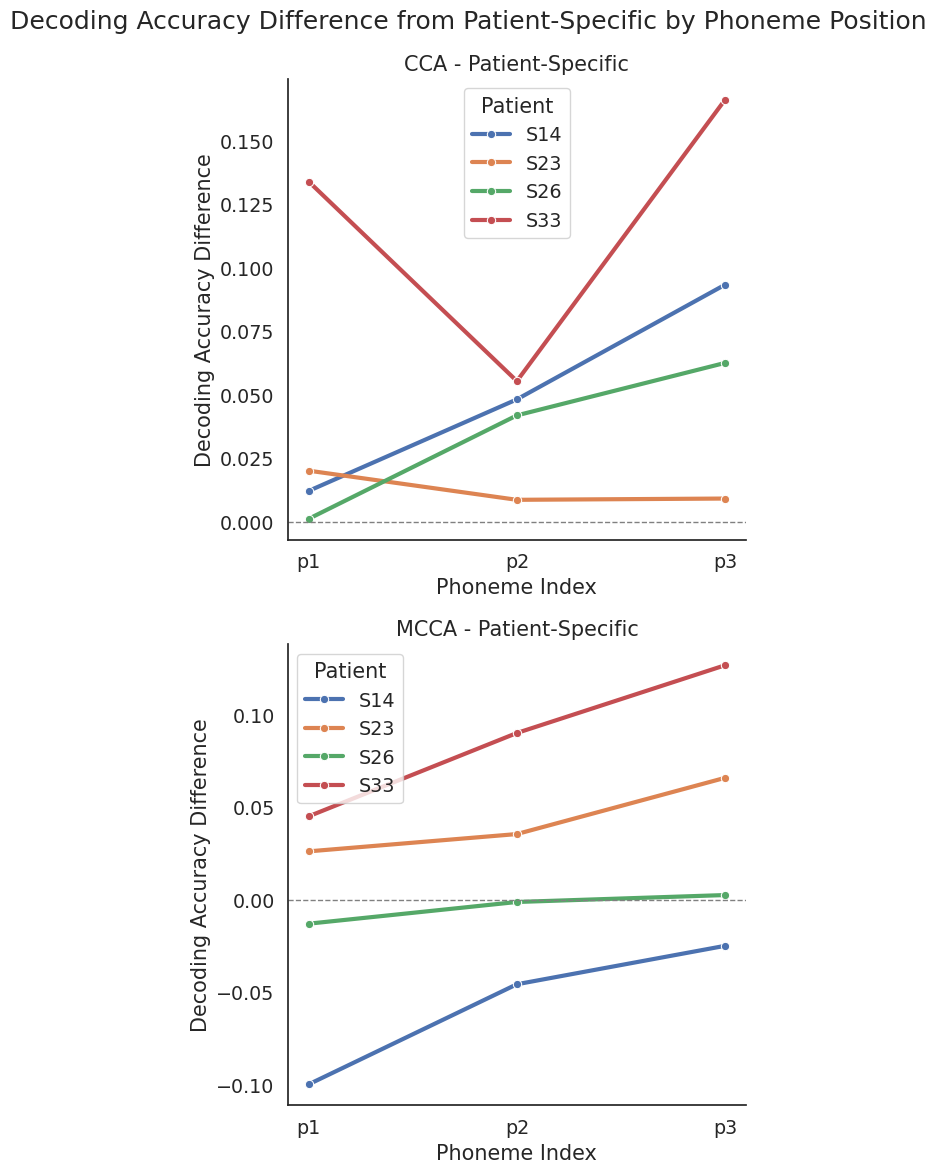

In [127]:
sns.set(style='white', font_scale=1.25)

fig_df = diff_df[diff_df['Phoneme Index'] != 'pAll']
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))
sns.lineplot(data=fig_df, x='Phoneme Index', y='CCA - Patient-Specific', hue='Patient', ax=ax1, linewidth=3, marker='o')
sns.lineplot(data=fig_df, x='Phoneme Index', y='MCCA - Patient-Specific', hue='Patient', ax=ax2, linewidth=3, marker='o')
ax1.axhline(0, color='grey', linestyle='--', linewidth=1)
ax2.axhline(0, color='grey', linestyle='--', linewidth=1)
ax1.set_ylabel('Decoding Accuracy Difference')
ax2.set_ylabel('Decoding Accuracy Difference')
ax1.set_title('CCA - Patient-Specific')
ax2.set_title('MCCA - Patient-Specific')
plt.suptitle('Decoding Accuracy Difference from Patient-Specific by Phoneme Position')
sns.despine()
plt.tight_layout()
plt.show()

## Old

In [14]:
def set_box_colors(bp, colors):
    for i in range(len(colors)):
        plt.setp(bp['boxes'][i], color=colors[i])
        plt.setp(bp['caps'][2*i], color=colors[i])
        plt.setp(bp['caps'][2*i + 1], color=colors[i])
        plt.setp(bp['whiskers'][2*i], color=colors[i])
        plt.setp(bp['whiskers'][2*i+1], color=colors[i])
        # plt.setp(bp['fliers'][i], color=colors[i])
        # plt.setp(bp['fliers'][2*i+1], color=colors[i])
        plt.setp(bp['medians'][i], color=colors[i])

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

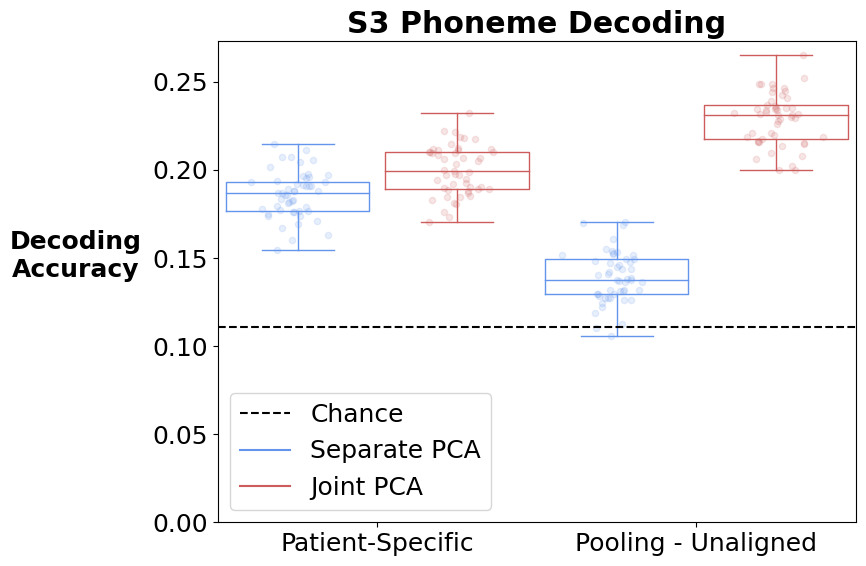

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

font = {'family' : 'sans-serif',
        'sans-serif' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

box_width = 0.9
sc_alpha = 0.15
sc_jitter = 0.1
spacing = 2
n_tar = 4
# n_no_tar = pAll_accs.shape[1] - n_tar
# n_no_tar = 5
# tar_colors = ['cornflowerblue', 'indianred', 'mediumpurple', 'darkorange']
tar_colors = ['cornflowerblue', 'indianred', 'cornflowerblue', 'indianred']
# tar_colors = ['cornflowerblue', 'cornflowerblue', 'indianred', 'indianred', 'mediumpurple', 'mediumpurple']
# no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen', 'darkorange', 'cornflowerblue']
no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen']

f, ax1 = plt.subplots(1, 1, figsize=(9, 6))
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
b1 = ax1.boxplot(list(p_tar), positions=range(n_tar), widths=box_width, sym='')
set_box_colors(b1, tar_colors)
for i in range(n_tar):
    x = np.random.normal(i, sc_jitter, size=len(p_tar[i,:]))
    ax1.scatter(x, p_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax1.boxplot(list(pAll_S26_tar), positions=range(n_tar + spacing, 2*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+(n_tar+spacing), sc_jitter, size=len(pAll_S26_tar[i,:]))
#     ax1.scatter(x, pAll_S26_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b3 = ax1.boxplot(list(pAll_S23_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b3, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S23_tar[i,:]))
#     ax1.scatter(x, pAll_S23_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax1.boxplot(list(pAll_S33_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S33_tar[i,:]))
#     ax1.scatter(x, pAll_S33_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)

ax1.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax1.axhline(1/4, color='black', linestyle='--', label='Chance')
ax1.set_ylim(bottom=0)
# ax1.set_xlabel('S3')
ax1.set_ylabel('Decoding\nAccuracy', weight='bold', rotation=0, labelpad=55)
# ax1.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2, 7*(n_tar+spacing)/2-n_tar/2])
# ax1.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2])
ax1.set_xticks([0.5, 2.5])
ax1.set_xticklabels(['Patient-Specific', 'Pooling - Unaligned'])
ax1.set_title('S3 Phoneme Decoding', weight='bold')

# legend creation
a = ax1.plot([], c=tar_colors[0], label='Separate PCA')
b = ax1.plot([], c=tar_colors[1], label='Joint PCA')
# c = ax1.plot([], c=tar_colors[4], label='CCA-Aligned (Phoneme Seq)')
# d = ax1.plot([], c=tar_colors[3], label='Aligned (Articulator Seq)')
# ax1.legend(loc=[0.6, 0.04])
# ax1.legend(loc=[0.02, 0.22])
ax1.legend()

plt.tight_layout()
plt.show()

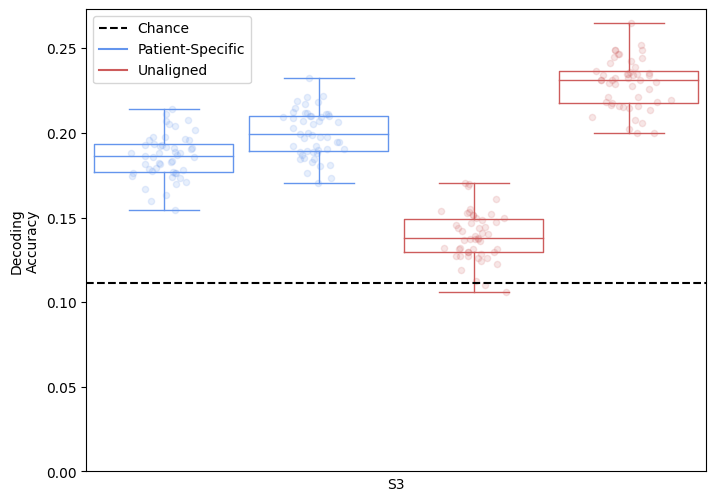

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

box_width = 0.9
sc_alpha = 0.15
sc_jitter = 0.1
spacing = 2
n_tar = 4
# n_no_tar = pAll_accs.shape[1] - n_tar
# n_no_tar = 5
# tar_colors = ['cornflowerblue', 'indianred', 'mediumpurple', 'darkorange']
tar_colors = ['cornflowerblue', 'cornflowerblue', 'indianred', 'indianred']
# tar_colors = ['cornflowerblue', 'cornflowerblue', 'indianred', 'indianred', 'mediumpurple', 'mediumpurple']
# no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen', 'darkorange', 'cornflowerblue']
no_tar_colors = ['indianred', 'mediumpurple', 'mediumseagreen']

f, ax1 = plt.subplots(1, 1, figsize=(8, 6))
# f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
b1 = ax1.boxplot(list(p_tar), positions=range(n_tar), widths=box_width, sym='')
set_box_colors(b1, tar_colors)
for i in range(n_tar):
    x = np.random.normal(i, sc_jitter, size=len(p_tar[i,:]))
    ax1.scatter(x, p_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax1.boxplot(list(pAll_S26_tar), positions=range(n_tar + spacing, 2*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+(n_tar+spacing), sc_jitter, size=len(pAll_S26_tar[i,:]))
#     ax1.scatter(x, pAll_S26_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b3 = ax1.boxplot(list(pAll_S23_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b3, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S23_tar[i,:]))
#     ax1.scatter(x, pAll_S23_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax1.boxplot(list(pAll_S33_tar), positions=range(2*(n_tar+spacing), 3*(n_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, tar_colors)
# for i in range(n_tar):
#     x = np.random.normal(i+2*(n_tar+spacing), sc_jitter, size=len(pAll_S33_tar[i,:]))
#     ax1.scatter(x, pAll_S33_tar[i,:], color=tar_colors[i], alpha=sc_alpha, s=20)

ax1.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax1.axhline(1/4, color='black', linestyle='--', label='Chance')
ax1.set_ylim(bottom=0)
ax1.set_xlabel('S3')
ax1.set_ylabel('Decoding\nAccuracy')
# ax1.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2, 7*(n_tar+spacing)/2-n_tar/2])
# ax1.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax1.set_xticks([n_tar/2, 3*(n_tar+spacing)/2-n_tar/2, 5*(n_tar+spacing)/2-n_tar/2])
ax1.set_xticks([])
# ax1.set_xticklabels(['S14', 'S26', 'S33'])
# ax1.set_title('S33 All Positions - Target data INCLUDED in training set')

# legend creation
a = ax1.plot([], c=tar_colors[0], label='Patient-Specific')
b = ax1.plot([], c=tar_colors[2], label='Unaligned')
# c = ax1.plot([], c=tar_colors[4], label='CCA-Aligned (Phoneme Seq)')
# d = ax1.plot([], c=tar_colors[3], label='Aligned (Articulator Seq)')
# ax1.legend(loc=[0.6, 0.04])
# ax1.legend(loc=[0.02, 0.22])
ax1.legend()


# b1 = ax2.boxplot(list(pAll_S14_no_tar), positions=range(n_no_tar), widths=box_width, sym='')
# set_box_colors(b1, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i, sc_jitter, size=len(pAll_S14_no_tar[i,:]))
#     ax2.scatter(x, pAll_S14_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# b2 = ax2.boxplot(list(pAll_S26_no_tar), positions=range(n_no_tar + spacing, 2*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b2, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i+(n_no_tar+spacing), sc_jitter, size=len(pAll_S26_no_tar[i,:]))
#     ax2.scatter(x, pAll_S26_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# # b3 = ax2.boxplot(list(pAll_S23_no_tar), positions=range(2*(n_no_tar+spacing), 3*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# # set_box_colors(b3, no_tar_colors)
# # for i in range(n_no_tar):
# #     x = np.random.normal(i+2*(n_no_tar+spacing), sc_jitter, size=len(pAll_S23_no_tar[i,:]))
# #     ax2.scatter(x, pAll_S23_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)
# b4 = ax2.boxplot(list(pAll_S33_no_tar), positions=range(2*(n_no_tar+spacing), 3*(n_no_tar+spacing)-spacing), widths=box_width, sym='')
# set_box_colors(b4, no_tar_colors)
# for i in range(n_no_tar):
#     x = np.random.normal(i+2*(n_no_tar+spacing), sc_jitter, size=len(pAll_S33_no_tar[i,:]))
#     ax2.scatter(x, pAll_S33_no_tar[i,:], color=no_tar_colors[i], alpha=sc_alpha, s=20)

# # ax2.axhline(1/9, color='black', linestyle='--', label='Chance')
# ax2.axhline(1/4, color='black', linestyle='--', label='Chance')
# ax2.set_ylim(bottom=0)
# ax2.set_xlabel('Target Patient')
# # ax2.set_ylabel('Decoding\nAccuracy')
# # ax2.set_xticks([n_tar/2, 3*n_tar/2 + 1, 5*n_tar/2 + 2, 7*n_tar/2 + 3])
# # ax2.set_xticks([n_tar/2, 3*(n_no_tar+spacing)/2-n_no_tar/2, 5*(n_no_tar+spacing)/2-n_no_tar/2, 7*(n_no_tar+spacing)/2-n_no_tar/2])
# # ax2.set_xticklabels(['S14', 'S26', 'S23', 'S33'])
# ax2.set_xticks([n_tar/2, 3*(n_no_tar+spacing)/2-n_no_tar/2, 5*(n_no_tar+spacing)/2-n_no_tar/2])
# ax2.set_xticklabels(['S14', 'S26', 'S33'])
# ax2.set_title('Target data EXCLUDED from training set')

# # legend creation
# a = ax2.plot([], c=no_tar_colors[0], label='Unaligned')
# b = ax2.plot([], c=no_tar_colors[1], label='Aligned (Phoneme Seq)')
# c = ax2.plot([], c=no_tar_colors[2], label='PS-Aligned to Random')
# # d = ax2.plot([], c=no_tar_colors[3], label='Aligned (Articulator Seq)')
# # e = ax2.plot([], c=no_tar_colors[4], label='AS Aligned to Random')
# # ax2.legend(loc=[0.46, 0.7])
# # ax2.legend(loc=[0.5, 0.78])
# ax2.legend()

# # plt.suptitle('All positions Phoneme Decoding with Cross-Patient CCA Alignment (no S23)')
# plt.suptitle('Position 3 Articulator Decoding with Cross-Patient CCA Alignment')
# plt.subplots_adjust(wspace=0.05)
plt.show()

## Trial Subsampling Test

In [7]:
# pt = 'S14'
# p_ind = -1
# p_str = 'All' if p_ind == -1 else str(p_ind)
context_to_colNames = {'ptSpecific': 'Patient-Specific', 'pooled_unaligned': 'Pooling - Unaligned', 'pooled_ccaAligned': 'Pooling - CCA Aligned', 'pooled_jointPCA': 'Pooling - Joint PCA'}

# p_tss = np.empty((3, 5, 50)) # pooling context, ss ratios, n_iter
# for i, context in enumerate(['ptSpecific', 'pooled_unaligned', 'pooled_ccaAligned']):
#     p_tss[i,0,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp20_{context}_noCV.pkl')['accs']
#     p_tss[i,1,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp40_{context}_noCV.pkl')['accs']
#     p_tss[i,2,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp60_{context}_noCV.pkl')['accs']
#     p_tss[i,3,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp80_{context}_noCV.pkl')['accs']
#     p_tss[i,3,:] = utils.load_pkl(DATA_PATH + f'{pt}/{pt}_p{p_str}_ncv_trSubsamp100_{context}_noCV.pkl')['accs']

dfs = []
for pt in ['S14', 'S26', 'S23']:
    for p in [1, 2, 3, -1]:
    # for p in [-1]:
        p_str = 'All' if p == -1 else str(p)
        for context in ['ptSpecific', 'pooled_unaligned', 'pooled_ccaAligned', 'pooled_jointPCA']:
            p_tss = np.zeros((5, 50))
            load_str = f'{pt}/p{p_str}/{pt}_p{p_str}_trSubsamp%s_{context}_rbf'

            # if context == 'pooled_jointPCA':
            #     load_str = f'{pt}/trSubsamp/p{p_str}/{pt}_p{p_str}_ncv_trSubsamp%s_{context}_rbf'
            # else:
            #     load_str = f'{pt}/{pt}_p{p_str}_ncv_trSubsamp%s_{context}_noCV'
            # suffix = '_rbf_pAlgn.pkl' if context == 'pooled_ccaAligned' else '_rbf.pkl'

            # suffix = '.pkl' if (context == 'ptSpecific' or pt == 'S23') else '_wS23.pkl'
            suffix = '.pkl'

            p_tss[0,:] = utils.load_pkl(DATA_PATH + (load_str % 20) + suffix)['accs']
            p_tss[1,:] = utils.load_pkl(DATA_PATH + (load_str % 40) + suffix)['accs']
            p_tss[2,:] = utils.load_pkl(DATA_PATH + (load_str % 60) + suffix)['accs']
            p_tss[3,:] = utils.load_pkl(DATA_PATH + (load_str % 80) + suffix)['accs']
            p_tss[4,:] = utils.load_pkl(DATA_PATH + (load_str % 100) + suffix)['accs']

            tss_df = pd.DataFrame(p_tss.T, columns=['20%', '40%', '60%', '80%', '100%'])
            tss_df = pd.melt(tss_df, var_name='Trial Subsampling Ratio', value_name='Decoding Accuracy')
            tss_df['Patient'] = pt
            tss_df['Decoding Context'] = context_to_colNames[context]
            tss_df['Phoneme'] = p_str
            cols = tss_df.columns.tolist()
            cols = cols[-3:] + cols[:-3]
            tss_df = tss_df[cols]
            dfs.append(tss_df)
tss_df = pd.concat(dfs)

In [8]:
tss_df

,Patient,Decoding Context,Phoneme,Trial Subsampling Ratio,Decoding Accuracy
0,S14,Patient-Specific,1,20%,0.245114
1,S14,Patient-Specific,1,20%,0.267600
2,S14,Patient-Specific,1,20%,0.244343
3,S14,Patient-Specific,1,20%,0.272191
4,S14,Patient-Specific,1,20%,0.239793
...,...,...,...,...,...
245,S23,Pooling - Joint PCA,All,100%,0.261540
246,S23,Pooling - Joint PCA,All,100%,0.203662
247,S23,Pooling - Joint PCA,All,100%,0.225903
248,S23,Pooling - Joint PCA,All,100%,0.213821


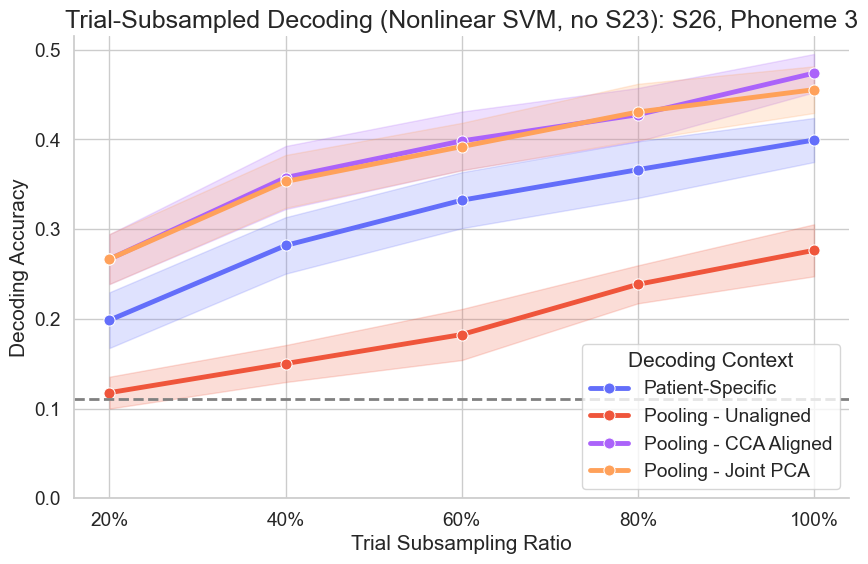

In [76]:
sns.set(style='whitegrid', font_scale=1.25)

pt_to_plot = 'S26'
p_to_plot = '3'
tss_colors = [px_default[i] for i in [0, 1, 3, 4]]

plt.figure(figsize=(10, 6))
g = sns.lineplot(
    data=tss_df[(tss_df['Phoneme']==p_to_plot) & (tss_df['Patient']==pt_to_plot)],
    x='Trial Subsampling Ratio',
    y='Decoding Accuracy',
    hue='Decoding Context',
    linewidth=3.5,
    palette=tss_colors,
    # style='.',
    marker='o',
    markersize=8,
    dashes=False,
    err_style='band',
    errorbar='sd',
)
ax = plt.gca()
ax.axhline(1/9, color='grey', linestyle='--', label='Chance', linewidth=2)
# g.set_xlim([0.1, 1.1])
g.set_ylim(bottom=0)
p_title = 'All Phonemes' if p_to_plot == 'All' else f'Phoneme {p_to_plot}'
# g.set_title(f'Trial-Subsampled Decoding (Linear SVM): S14, {p_title}', fontsize=18)
g.set_title(f'Trial-Subsampled Decoding (Nonlinear SVM, no S23): {pt_to_plot}, {p_title}', fontsize=18)

sns.despine()
plt.show()

In [9]:
tss_df

,Patient,Decoding Context,Phoneme,Trial Subsampling Ratio,Decoding Accuracy
0,S14,Patient-Specific,1,20%,0.245114
1,S14,Patient-Specific,1,20%,0.267600
2,S14,Patient-Specific,1,20%,0.244343
3,S14,Patient-Specific,1,20%,0.272191
4,S14,Patient-Specific,1,20%,0.239793
...,...,...,...,...,...
245,S23,Pooling - Joint PCA,All,100%,0.261540
246,S23,Pooling - Joint PCA,All,100%,0.203662
247,S23,Pooling - Joint PCA,All,100%,0.225903
248,S23,Pooling - Joint PCA,All,100%,0.213821


In [58]:
tss_ps_cca_S14 = tss_df[(tss_df['Phoneme']=='All') & ((tss_df['Decoding Context']=='Pooling - CCA Aligned') | (tss_df['Decoding Context']=='Patient-Specific')) & (tss_df['Patient'] == 'S14')].drop(columns=['Phoneme', 'Patient'])
tss_ps_cca_S14 = tss_ps_cca_S14.groupby(['Decoding Context', 'Trial Subsampling Ratio']).agg({'Decoding Accuracy': 'mean'})
tss_ps_cca_S14

Decoding Accuracy
Decoding Context      Trial Subsampling Ratio                   
Patient-Specific      100%                              0.363988
                      20%                               0.234489
                      40%                               0.286665
                      60%                               0.320775
                      80%                               0.345757
Pooling - CCA Aligned 100%                              0.400642
                      20%                               0.285462
                      40%                               0.327832
                      60%                               0.366492
                      80%                               0.383944

In [59]:
tss_ps_cca_S14['Trial Subsampling Ratio'] = tss_ps_cca_S14.index.get_level_values('Trial Subsampling Ratio')
tss_ps_cca_S14 = tss_ps_cca_S14.reset_index(drop=True)
tss_ps_cca_S14['diffs'] = tss_ps_cca_S14.groupby('Trial Subsampling Ratio')['Decoding Accuracy'].diff()
tss_ps_cca_S14['Trial Subsampling Ratio'] = tss_ps_cca_S14['Trial Subsampling Ratio'].apply(lambda x: int(x[:-1]))
tss_ps_cca_S14 = tss_ps_cca_S14.dropna().drop(columns=['Decoding Accuracy']).sort_values(by='Trial Subsampling Ratio')

In [60]:

tss_ps_cca_S14

,Trial Subsampling Ratio,diffs
6,20,0.050972
7,40,0.041167
8,60,0.045717
9,80,0.038187
5,100,0.036654


/tmp/ipykernel_509405/427999690.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


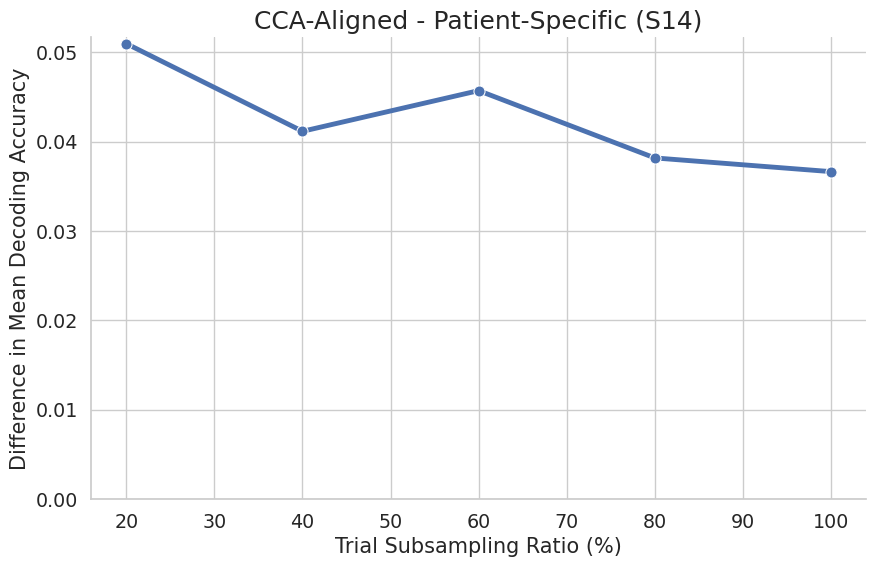

In [66]:
sns.set(style='whitegrid', font_scale=1.25)

tss_colors = [px_default[i] for i in [0, 1, 3, 4]]

plt.figure(figsize=(10, 6))
g = sns.lineplot(
    data=tss_ps_cca_S14,
    x='Trial Subsampling Ratio',
    y='diffs',
    linewidth=3.5,
    palette=tss_colors,
    # style='.',
    marker='o',
    markersize=8,
    dashes=False,
    err_style='band',
    errorbar='sd',
)
ax = plt.gca()
# g.set_xlim([0.1, 1.1])
g.set_ylim(bottom=0)
# p_title = 'All Phonemes' if p_to_plot == 'All' else f'Phoneme {p_to_plot}'
# g.set_title(f'Trial-Subsampled Decoding (Linear SVM): S14, {p_title}', fontsize=18)
ax.set_ylabel('Difference in Mean Decoding Accuracy')
ax.set_xlabel('Trial Subsampling Ratio (%)')
g.set_title(f'CCA-Aligned - Patient-Specific (S14)', fontsize=18)

sns.despine()
plt.show()

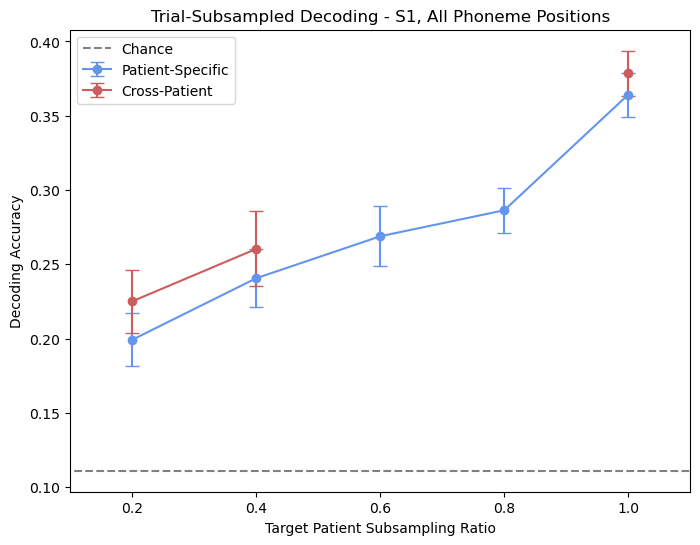

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# b1 = plt.boxplot(list(p_tss[0,:,:]), positions=[0.2, 0.4, 0.6, 0.8, 1.0], widths=0.1)
# set_box_colors(b1, ['cornflowerblue']*5)
# plt.plot([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[0,:,:], axis=1), color='cornflowerblue', label='Patient-Specific')
plt.errorbar([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[0,:,:], axis=1), yerr=np.std(p_tss[0,:,:], axis=1), color='cornflowerblue', label='Patient-Specific', capsize=5, fmt='-o')

# b2 = plt.boxplot(list(p_tss[1,:,:]), positions=[0.2, 0.4, 0.6, 0.8, 1.0], widths=0.1)
# set_box_colors(b2, ['indianred']*5)
# plt.plot([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[1,:,:], axis=1), color='indianred', label='Cross-Patient')
plt.errorbar([0.2, 0.4, 0.6, 0.8, 1.0], np.mean(p_tss[1,:,:], axis=1), yerr=np.std(p_tss[1,:,:], axis=1), color='indianred', label='Cross-Patient', capsize=5, fmt='-o')

plt.hlines(1/9, xmin=0, xmax=1.2, color='grey', linestyle='--', label='Chance')

plt.xlim(0.1, 1.1)
plt.legend()
plt.title('Trial-Subsampled Decoding - S1, All Phoneme Positions')
plt.ylabel('Decoding Accuracy')
plt.xlabel('Target Patient Subsampling Ratio')
plt.show()

## Script Accuracy Comparison

In [102]:
test_orig = utils.load_pkl(DATA_PATH + f'S14/S14_pAll_pooled_ccaAligned_cmp.pkl')['accs']
test_noCV = utils.load_pkl(DATA_PATH + f'S14/trSubsamp/pAll/S14_pAll_ncv_trSubsamp100_pooled_ccaAligned_noCV_pAlgn.pkl')['accs']
test_noCV_up = utils.load_pkl(DATA_PATH + f'S14/S14_pAll_ncv_pooled_ccaAligned_updatedNoCV_lin.pkl')['accs']
test_noCV_up_noDR = utils.load_pkl(DATA_PATH + f'S14/S14_pAll_ncv_pooled_ccaAligned_updatedNoCV_lin_noDR.pkl')['accs']

In [104]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import fdrcorrection

tt_orig_cv = ttest_ind(test_orig, test_noCV)
tt_orig_cvUp = ttest_ind(test_orig, test_noCV_up)
tt_orig_noDR = ttest_ind(test_orig, test_noCV_up_noDR)
tt_cv_cvUp = ttest_ind(test_noCV, test_noCV_up)
tt_cvUp_noDR = ttest_ind(test_noCV_up, test_noCV_up_noDR)

p_vals_uncor = [tt_orig_cv[1], tt_orig_cvUp[1], tt_orig_noDR[1], tt_cv_cvUp[1], tt_cvUp_noDR[1]]
p_vals_cor = fdrcorrection(p_vals_uncor)[1]

In [106]:
print(np.mean(test_orig) - np.mean(test_noCV_up_noDR))

0.007375492129903516


In [109]:
from scipy.stats import permutation_test
def statistic(x,y,axis):
    return np.mean(x,axis=axis) - np.mean(y,axis=axis)
res = permutation_test((test_orig, test_noCV_up_noDR), statistic)
print(res)

PermutationTestResult(statistic=0.007375492129903516, pvalue=0.0056, null_distribution=array([ 0.00378805,  0.00413342,  0.00139382, ...,  0.00025889,
        0.00319747, -0.00084865]))


In [105]:
print(p_vals_uncor)

[2.5236338187390733e-16, 4.0377126898640253e-13, 0.0060698030399875735, 0.13596477087945014, 5.282072959426172e-08]


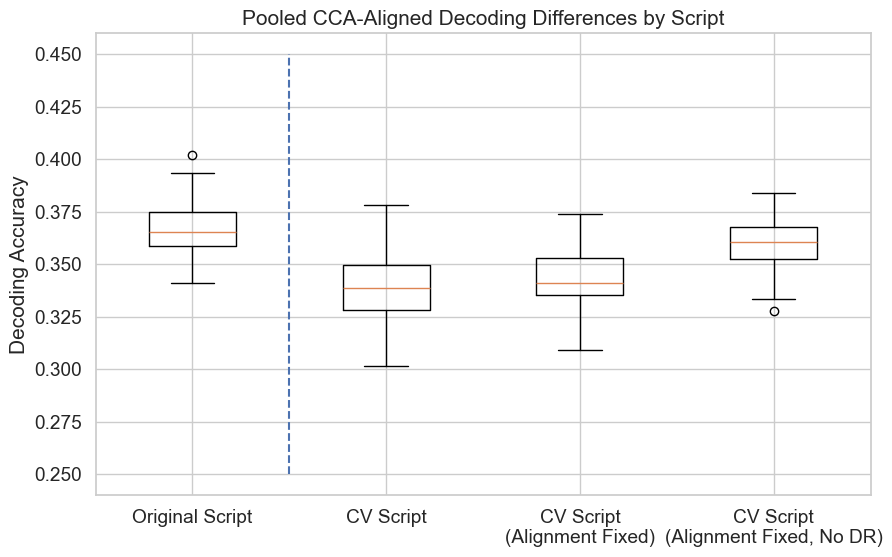

In [103]:
plt.figure(figsize=(10, 6))
plt.boxplot([test_orig, test_noCV, test_noCV_up, test_noCV_up_noDR])
plt.vlines(1.5, 0.25, 0.45, linestyles='dashed')
plt.xticks([1, 2, 3, 4], ['Original Script', 'CV Script', 'CV Script\n(Alignment Fixed)', 'CV Script\n(Alignment Fixed, No DR)'])
plt.ylabel('Decoding Accuracy')
plt.title('Pooled CCA-Aligned Decoding Differences by Script')
plt.show()

# Testing Out Decoder Classes

In [2]:
import utils

pt = 'S14'
p_ind = -1

tr_subsamp_r = 1

algn_type = 'phon_seq'
algn_grouping = 'class'

# decoding label type
lab_type = 'phon'
# lab_type = 'artic'

# decoding run filename
filename_suffix = 'new_joint_pca_pt-specific'
filename = f'../acc_data/joint_algn_accs/{pt}_{"p" if lab_type == "phon" else "a"}{"All" if p_ind == -1 else p_ind}_{filename_suffix}.pkl'

# load data
pt_data = utils.load_pkl('../data/pt_decoding_data.pkl')
tar_data, pre_data = utils.decoding_data_from_dict(pt_data, pt, p_ind,
                                                   lab_type=lab_type,
                                                   algn_type=algn_type)
D_tar, lab_tar, lab_tar_full = tar_data
D1, lab1, lab1_full = pre_data[0]
D2, lab2, lab2_full = pre_data[1]
D3, lab3, lab3_full = pre_data[2]

In [40]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import balanced_accuracy_score
from skopt import BayesSearchCV

from alignment_methods import CCAAlign
from cross_pt_decoders import crossPtDecoder_sepDimRed, crossPtDecoder_sepAlign


class DimRedReshape(BaseEstimator):

    def __init__(self, dim_red, n_components=10):
        self.dim_red = dim_red
        self.n_components = n_components

    def fit(self, X, y=None):
        # X_r = X.reshape(-1, X.shape[-1])
        X_r = X.reshape(X.shape[0], -1)
        self.transformer = self.dim_red(n_components=self.n_components)
        self.transformer.fit(X_r)
        return self

    def transform(self, X, y=None):
        # X_r = X.reshape(-1, X.shape[-1])
        X_r = X.reshape(X.shape[0], -1)
        X_dr = self.transformer.transform(X_r)
        # X_dr = X_dr.reshape(X.shape[0], -1)
        return X_dr

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
dim_red = PCA    

cv = StratifiedKFold(n_splits=5, shuffle=True)
# clf = make_pipeline(StandardScaler(), BaggingClassifier(
#                                                 estimator=SGDClassifier(
#                                                     penalty='elasticnet',
#                                                     early_stopping=True,
#                                                     l1_ratio=0.3,
#                                                     n_jobs=-1),
#                                                 n_estimators=10))
# clf = BaggingClassifier(estimator=SVC(kernel='linear'), n_estimators=10)
# clf = Pipeline([('normalize', StandardScaler()),
#                ('classifier', BaggingClassifier(
#                                 estimator=SVC(kernel='linear'),
#                                 n_estimators=10))])
# clf = make_pipeline(BaggingClassifier(estimator=SVC(), n_estimators=10))
# clf = make_pipeline(DimRedReshape(dim_red, n_components=0.8),
#                     BaggingClassifier(estimator=SVC(),
#                                       n_estimators=10))
clf = make_pipeline(DimRedReshape(dim_red, n_components=0.8),
                    BaggingClassifier(estimator=SVC(),
                                      n_estimators=10))

# param_grid = {'n_comp': [40, 50],
#               'decoder__baggingclassifier__estimator__alpha': [1e-5, 1e-4, 1e-3]
#               }
# param_grid = [{'decoder__estimator__kernel': ['rbf'],
#                'decoder__estimator__gamma': [1e-3, 1e-4],
#                'decoder__estimator__C': [0.1, 0.5, 1, 10, 100],
#                'n_comp': [10, 20, 30, 40, 50]}, 
#                {'decoder__estimator__kernel': ['linear'],
#                'decoder__estimator__C': [0.1, 0.5, 1, 10, 100],
#                'n_comp': [10, 20, 30, 40, 50]}]
# param_grid = {'n_comp': (10, 50),
#               'decoder__baggingclassifier__estimator__C': (1e-6, 1e1, 'log-uniform')
#               }
param_grid = {
        'n_comp': (10, 50),
        'decoder__dimredreshape__n_components': (0.1, 0.95, 'uniform'),
        'decoder__baggingclassifier__estimator__C': (1e-6, 1e1, 'log-uniform'),
                 }

param_grid_single = {
        'dimredreshape__n_components': (0.1, 0.95, 'uniform'),
        'baggingclassifier__estimator__C': (1e-6, 1e1, 'log-uniform'),
                 }

bal_accs = []
n_iter = 1
for j in range(n_iter):
    y_true_all, y_pred_all = [], []
    for i, (train_idx, test_idx) in enumerate(cv.split(D_tar, lab_tar)):
        print(f'Fold {i+1}')
        D_tar_train, D_tar_test = D_tar[train_idx], D_tar[test_idx]
        lab_tar_train, lab_tar_test = lab_tar[train_idx], lab_tar[test_idx]
        lab_tar_full_train, lab_tar_full_test = (lab_tar_full[train_idx],
                                                lab_tar_full[test_idx])
        
        # subsample training data observations/trials
        if tr_subsamp_r < 1:
            # train test split to subsample training data with stratification
            # (could also use np.random.choice for non-stratified subsampling)
            D_tar_train, _, lab_tar_train, _, lab_tar_full_train, _ = (
                                    train_test_split(D_tar_train, lab_tar_train,
                                                        lab_tar_full_train,
                                                        train_size=tr_subsamp_r,
                                                        stratify=lab_tar_train,
                                                        shuffle=True))

        # search_cpt_dec = crossPtDecoder_sepDimRed([(D1, lab1, lab1_full),
        #                                            (D2, lab2, lab2_full),
        #                                            (D3, lab3, lab3_full)],
        #                                            clf, dim_red=PCA)
        cross_pt_data = [(D1, lab1, lab1_full),
                        (D2, lab2, lab2_full),
                        (D3, lab3, lab3_full),
                        ]
        search_cpt_dec = crossPtDecoder_sepAlign(cross_pt_data, clf, CCAAlign,
                                                 dim_red=dim_red)
        # search = RandomizedSearchCV(search_cpt_dec, param_grid, n_iter=5, cv=cv, n_jobs=-1, verbose=1)
        # search = GridSearchCV(search_cpt_dec, param_grid, cv=5, verbose=5, n_jobs=-1)
        # search = BayesSearchCV(search_cpt_dec, param_grid, n_iter=10, cv=cv,
        #                        verbose=5, n_jobs=2, n_points=5)
        # search.fit(D_tar_train, lab_tar_train, y_align=lab_tar_full_train)
        # print(f'Best Params: {search.best_params_}, Best Score: {search.best_score_}')
        # y_pred = search.predict(D_tar_test)

        # search = BayesSearchCV(clf, param_grid_single, n_iter=10, cv=cv,
        #                        verbose=5, n_jobs=2, n_points=5)
        # search.fit(D_tar_train, lab_tar_train)
        # print(f'Best Params: {search.best_params_}, Best Score: {search.best_score_}')
        # y_pred = search.predict(D_tar_test)

        # cpt_dec = crossPtDecoder_sepDimRed(cross_pt_data, clf, dim_red=dim_red,
        #                                    n_comp=40)
        cpt_dec = crossPtDecoder_sepAlign(cross_pt_data, clf, CCAAlign,
                                          dim_red=dim_red, n_comp=40)
        # cpt_dec.set_params(**search.best_params_)
        cpt_dec.fit(D_tar_train, lab_tar_train, y_align=lab_tar_full_train)
        y_pred = cpt_dec.predict(D_tar_test)

        # clf.fit(D_tar_train, lab_tar_train)
        # y_pred = clf.predict(D_tar_test)
        
        y_true_all.extend(lab_tar_test)
        y_pred_all.extend(y_pred)
    b_acc = balanced_accuracy_score(y_true_all, y_pred_all)
    bal_accs.append(b_acc)
    print(f'Iter {j+1} Balanced Accuracy: {b_acc}\n')
print(f'Average Balanced Accuracy: {np.mean(bal_accs)}')


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Iter 1 Balanced Accuracy: 0.38287157168831754

Average Balanced Accuracy: 0.38287157168831754
